# Projet Python : Santé

In [1]:
import time
import requests
import numpy as np
import pandas as pd
from selenium import webdriver
import geckodriver_autoinstaller
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException
import plotly.graph_objects as go
import plotly.express as px

geckodriver_autoinstaller.install() 

'/anaconda3/lib/python3.7/site-packages/geckodriver_autoinstaller/v0.28.0/geckodriver'

# Récupération des données

## Fonctions et listes utiles aux scrapping

In [312]:
noms_departements_propre = ['Ain', 'Aisne', 'Allier', 'Alpes-de-Haute-Provence', 'Hautes-Alpes',
       'Alpes-Maritimes', 'Ardèche', 'Ardennes', 'Ariège', 'Aube', 'Aude',
       'Aveyron', 'Bouches-du-Rhône', 'Calvados', 'Cantal', 'Charente',
       'Charente-Maritime', 'Cher', 'Corrèze', "Côte-d'Or", "Côtes-d'Armor",
        'Creuse', 'Dordogne', 'Doubs', 'Drôme', 'Eure', 'Eure-et-Loir',
       'Finistère', 'Corse-du-Sud', 'Haute-Corse', 'Gard', 'Haute-Garonne',
       'Gers', 'Gironde', 'Hérault', 'Ille-et-Vilaine', 'Indre',
       'Indre-et-Loire', 'Isère', 'Jura', 'Landes', 'Loir-et-Cher', 'Loire',
       'Haute-Loire', 'Loire-Atlantique', 'Loiret', 'Lot', 'Lot-et-Garonne',
       'Lozère', 'Maine-et-Loire', 'Manche', 'Marne', 'Haute-Marne', 'Mayenne',
       'Meurthe-et-Moselle', 'Meuse', 'Morbihan', 'Moselle', 'Nièvre', 'Nord',
       'Oise', 'Orne', 'Pas-de-Calais', 'Puy-de-Dôme', 'Pyrénées-Atlantiques',
       'Hautes-Pyrénées', 'Pyrénées-Orientales', 'Bas-Rhin', 'Haut-Rhin',
       'Rhône', 'Haute-Saône', 'Saône-et-Loire', 'Sarthe', 'Savoie',
       'Haute-Savoie', 'Paris', 'Seine-Maritime', 'Seine-et-Marne', 'Yvelines',
       'Deux-Sèvres', 'Somme', 'Tarn', 'Tarn-et-Garonne', 'Var', 'Vaucluse',
       'Vendée', 'Vienne', 'Haute-Vienne', 'Vosges', 'Yonne',
       'Territoire de Belfort', 'Essonne', 'Hauts-de-Seine',
       'Seine-Saint-Denis', 'Val-de-Marne', "Val-d'Oise"]

In [311]:
noms_departements = ['Ain', 'Aisne', 'Allier (03)', 'Alpes-de-Haute-Provence', 'Hautes-Alpes',
       'Alpes-Maritimes', 'Ardèche', 'Ardennes', 'Ariège', 'Aube (10)', 'Aude',
       'Aveyron', 'Bouches-du-Rhône', 'Calvados', 'Cantal', 'Charente',
       'Charente-Maritime', 'Cher (18)', 'Corrèze (19)', "Côte-d'Or", "Côtes-d'Armor (22)",
        'Creuse (23)', 'Dordogne (24)', 'Doubs (25)', 'Drôme (26)', 'Eure (27)', 'Eure-et-Loir (28)',
       'Finistère (29)', 'Corse-du-Sud (2A)', 'Haute-Corse (2B)', 'Gard (30)', 'Haute-Garonne (31)',
       'Gers (32)', 'Gironde (33)', 'Hérault (34)', 'Ille-et-Vilaine (35)', 'Indre (36)',
       'Indre-et-Loire (37)', 'Isère (38)', 'Jura (39)', 'Landes (40)', 'Loir-et-Cher (41)', 'Loire (42)',
       'Haute-Loire (43)', 'Loire-Atlantique (44)', 'Loiret (45)', 'Lot (46)', 'Lot-et-Garonne (47)',
       'Lozère (48)', 'Maine-et-Loire (49)', 'Manche (50)', 'Marne (51)', 'Haute-Marne (52)', 'Mayenne (53)',
       'Meurthe-et-Moselle (54)', 'Meuse (55)', 'Morbihan (56)', 'Moselle (57)', 'Nièvre (58)', 'Nord (59)',
       'Oise (60)', 'Orne (61)', 'Pas-de-Calais (62)', 'Puy-de-Dôme (63)', 'Pyrénées-Atlantiques (64)',
       'Hautes-Pyrénées (65)', 'Pyrénées-Orientales (66)', 'Bas-Rhin (67)', 'Haut-Rhin (68)',
       'Rhône (69)', 'Haute-Saône (70)', 'Saône-et-Loire (71)', 'Sarthe (72)', 'Savoie (73)',
       'Haute-Savoie (74)', 'Paris (75)', 'Seine-Maritime (76)', 'Seine-et-Marne (77)', 'Yvelines (78)',
       'Deux-Sèvres (79)', 'Somme (80)', 'Tarn (81)', 'Tarn-et-Garonne (82)', 'Var (83)', 'Vaucluse (84)',
       'Vendée (85)', 'Vienne (86)', 'Haute-Vienne (87)', 'Vosges (88)', 'Yonne (89)',
       'Territoire de Belfort (90)', 'Essonne (91)', 'Hauts-de-Seine (92)',
       'Seine-Saint-Denis (93)', 'Val-de-Marne (94)', "Val-d'Oise (95)"]

In [ ]:
def get_column(param, driver, noms, lien, lettre, maladie, retour, covid):
    L = []
    driver.get(lien)
    time.sleep(15)
    driver.find_element_by_xpath(lettre).click()
    time.sleep(2)
    driver.find_element_by_xpath(maladie).click()
    time.sleep(2)
    if covid:
        driver.find_element_by_xpath(param[0]).click()
        time.sleep(2)
    driver.execute_script("arguments[0].scrollIntoView();", driver.find_element_by_xpath(param[1]))
    time.sleep(2)
    driver.find_element_by_xpath(param[1]).click()
    time.sleep(2)
    driver.execute_script("arguments[0].scrollIntoView();", driver.find_element_by_link_text(param[2]))
    time.sleep(2)
    ActionChains(driver).move_to_element(driver.find_element_by_link_text(param[2])).click().perform()
    time.sleep(3)
    ActionChains(driver).move_to_element(driver.find_element_by_partial_link_text("SYNTH")).click().perform()
    time.sleep(1)
    for p in range(len(noms)):
        driver.find_element_by_link_text('Rechercher un territoire').click()
        time.sleep(1)
        driver.find_element_by_xpath("//input[@class='input-in-row flex-item-fluid']").send_keys(noms[p])
        time.sleep(2)
        driver.find_element_by_xpath("//button[@data-link='{on search}']").click()
        time.sleep(2.5)
        driver.find_element_by_partial_link_text(noms[p]).click()
        time.sleep(2.5)
        ActionChains(driver).move_to_element(driver.find_element_by_xpath("//div[@class='fic-valref-buttons']")).click().perform()
        time.sleep(1)
        ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='grille no-print']")).click().perform()
        time.sleep(2)
        try:
            driver.find_element_by_link_text('Données').click()
            time.sleep(1)
        except NoSuchElementException:
            ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='grille no-print']")).click().perform()
            time.sleep(2)
            driver.find_element_by_link_text('Données').click()
            time.sleep(1)
        Table = driver.find_element_by_xpath("//tbody")
        Row = Table.find_element_by_xpath("//tr")
        Cells = Row.find_elements_by_xpath("//td[2]")
        Res = [cell.text for cell in Cells]
        L.append([np.nan if (a == 'N/A - résultat non disponible' or a == 'N/A - division par 0') else float(a.replace('\u202f','').replace(',','.').replace(' ', '')) for a in Res[7:]])
    ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='removeItem hide-iframe']")).click().perform()
    time.sleep(2)
    driver.find_element_by_link_text(retour).click()
    return L

In [52]:
def get_column_f(param, driver, noms, lien, lettre, maladie, retour, covid):
    L = []
    driver.get(lien)
    time.sleep(10)
    driver.find_element_by_xpath(lettre).click()
    time.sleep(1)
    driver.find_element_by_xpath(maladie).click()
    time.sleep(1)
    if covid:
        driver.find_element_by_xpath(param[0]).click()
        time.sleep(2)
    driver.execute_script("arguments[0].scrollIntoView();", driver.find_element_by_xpath(param[1]))
    time.sleep(2)
    driver.find_element_by_xpath(param[1]).click()
    time.sleep(2)
    driver.execute_script("arguments[0].scrollIntoView();", driver.find_element_by_link_text(param[2]))
    time.sleep(2)
    ActionChains(driver).move_to_element(driver.find_element_by_link_text(param[2])).click().perform()
    time.sleep(2)
    ActionChains(driver).move_to_element(driver.find_element_by_partial_link_text("SYNTH")).click().perform()
    time.sleep(1)
    ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='grille no-print']")).click().perform()
    time.sleep(2)
    try:
        driver.find_element_by_link_text('Données').click()
        time.sleep(1)
    except NoSuchElementException:
        ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='grille no-print']")).click().perform()
        time.sleep(2)
        driver.find_element_by_link_text('Données').click()
        time.sleep(1)
    Table = driver.find_element_by_xpath("//tbody")
    Row = Table.find_element_by_xpath("//tr")
    Cells = Row.find_elements_by_xpath("//td[2]")
    Res = [cell.text for cell in Cells]
    L = [np.nan if a == 'N/A - résultat non disponible' else float(a.replace('\u202f','').replace(',','.').replace(' ', '')) for a in Res[7:]]
    ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='removeItem hide-iframe']")).click().perform()
    time.sleep(2)
    driver.find_element_by_link_text(retour).click()
    return L

In [372]:
def scrap(Tab, get_column, parametre, noms, lien, lettre, maladie, retour, covid):
    for i in range(len(parametre)):
        driver = webdriver.Firefox()
        col = get_column(parametre[i], driver, noms, lien, lettre, maladie, retour, covid)
        time.sleep(1)
        Tab.append(col)
        driver.close()

In [337]:
def get_dataframe(Tab, ind, noms_colonnes):
    rows = []
    for j in range(len(Tab[0])):
        row = [Tab[i][j] for i in range(len(Tab))]
        rows.append(row)
    Rows = np.array(rows)
    return pd.DataFrame(Rows, index = ind, columns = noms_colonnes)

In [334]:
def get_dataframe_from_ar(ar, ind, noms_colonnes):
    temp = []
    for k in range(len(ind)):
        row_1 = []
        for j in range(len(noms_departements)):
            row_2 = []
            for i in range(len(noms_colonnes)):
                row_2.append(ar[i,j,k])
            row_1.append(row_2)
        temp.append(pd.DataFrame(row_1, index = noms_departements_propre, columns = noms_colonnes))
    return pd.DataFrame(temp, index = ind, columns = ["data"])

## Données COVID-19

### A l'échelle des départements

In [313]:
noms_colonnes = ['Nombre de personnes hospitalisées', 'Nombre de personnes hospitalisées - Hommes', 'Nombre de personnes hospitalisées - Femmes',
        'Nombre de personnes en réanimation', 'Nombre de personnes en réanimation - Hommes', 'Nombre de personnes en réanimation - Femmes',
        'Nombre cumulé de décès', 'Nombre cumulé de décès - Hommes', 'Nombre cumulé de décès - Femmes',
        'Taux de posivité',
        'Nombre de passages COVID-19 quotidien aux urgences', 'Nombre de passages COVID-19 quotidien aux urgences - moins de 15 ans', 'Nombre de passages COVID-19 quotidien aux urgences - 15-44 ans', 'Nombre de passages COVID-19 quotidien aux urgences - 45-64 ans', 'Nombre de passages COVID-19 quotidien aux urgences - 65-74 ans', 'Nombre de passages COVID-19 quotidien aux urgences - 75 ans ou plus']

In [371]:
parametre = [["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.hosp']", 'hommes et femmes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.hosp']", 'hommes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.hosp']", 'femmes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.rea']", 'hommes et femmes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.rea']", 'hommes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.rea']", 'femmes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.dc']", 'hommes et femmes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.dc']", 'hommes'],
             ["//li[@data-pk='covid_sivic']", "//div[@data-pk='covid_hospit.dc']", 'femmes'],
             ["//li[@data-pk='covid_sidep']", "//div[@data-pk='sp_pos_quot.tx_pos_quot']", 'tous âges'],
             ["//li[@data-pk='covid_oscour']", "//div[@data-pk='sursaud_corona_quot.nbre_pass_corona']", 'tous âges'],
             ["//li[@data-pk='covid_oscour']", "//div[@data-pk='sursaud_corona_quot.nbre_pass_corona']", 'moins de 15 ans'],
             ["//li[@data-pk='covid_oscour']", "//div[@data-pk='sursaud_corona_quot.nbre_pass_corona']", '15-44 ans'],
             ["//li[@data-pk='covid_oscour']", "//div[@data-pk='sursaud_corona_quot.nbre_pass_corona']", '45-64 ans'],
             ["//li[@data-pk='covid_oscour']", "//div[@data-pk='sursaud_corona_quot.nbre_pass_corona']", '65-74 ans'],
             ["//li[@data-pk='covid_oscour']", "//div[@data-pk='sursaud_corona_quot.nbre_pass_corona']", '75 ans ou plus']]

In [28]:
Tab = []

In [40]:
scrap(Tab, get_column, parametre, noms, "https://geodes.santepubliquefrance.fr/#c=indicator&view=map2", "//div[@data-pk='patho_c']", "//li[@data-pk='covid']", 'COVID-19', True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
--------- 14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
--------- 15


In [69]:
Tab_sav = np.array(Tab)

print(Tab_sav.shape)

with open(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/Tab_sav.csv', 'w') as file:
    for slice_2d in Tab_sav:
        np.savetxt(file, slice_2d)

(16, 96, 264)


In [539]:
driver = webdriver.Firefox()

driver.get("https://geodes.santepubliquefrance.fr/#c=indicator&view=map2")
time.sleep(15)
    
driver.find_element_by_xpath("//div[@data-pk='patho_c']").click()
time.sleep(1)
    
driver.find_element_by_xpath("//li[@data-pk='covid']").click()
time.sleep(1)

driver.find_element_by_xpath("//li[@data-pk='covid_sivic']").click()
time.sleep(2)
driver.find_element_by_xpath("//div[@data-pk='covid_hospit.hosp']").click()
time.sleep(2)
ActionChains(driver).move_to_element(driver.find_element_by_link_text('hommes et femmes')).click().perform()
time.sleep(2)
ActionChains(driver).move_to_element(driver.find_element_by_partial_link_text("SYNTH")).click().perform()
time.sleep(1)
ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='grille no-print']")).click().perform()
time.sleep(2)
driver.find_element_by_link_text('Données').click()
time.sleep(1)

Table = driver.find_element_by_xpath("//tbody")
Row = Table.find_element_by_xpath("//tr")
Cells = Row.find_elements_by_xpath("//td[1]")
Res = [cell.text for cell in Cells]
date = [a for a in Res[7 : len(Res) - 7]]

NoSuchWindowException: Message: Browsing context has been discarded


In [325]:
ar_covid_temp = np.loadtxt(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/Tab_sav.csv').reshape((len(noms_colonnes), len(noms_departements), len(date)))

In [326]:
df_covid_temp = get_dataframe_from_ar(ar_covid_temp, date, noms_colonnes)
df_covid_temp.iloc[0, 0]

,Nombre de personnes hospitalisées,Nombre de personnes hospitalisées - Hommes,Nombre de personnes hospitalisées - Femmes,Nombre de personnes en réanimation,Nombre de personnes en réanimation - Hommes,Nombre de personnes en réanimation - Femmes,Nombre cumulé de décès,Nombre cumulé de décès - Hommes,Nombre cumulé de décès - Femmes,Taux de posivité,Nombre de passages COVID-19 quotidien aux urgences,Nombre de passages COVID-19 quotidien aux urgences - moins de 15 ans,Nombre de passages COVID-19 quotidien aux urgences - 15-44 ans,Nombre de passages COVID-19 quotidien aux urgences - 45-64 ans,Nombre de passages COVID-19 quotidien aux urgences - 65-74 ans,Nombre de passages COVID-19 quotidien aux urgences - 75 ans ou plus
Ain,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,24.0,2.0,11.0,8.0,1.0,2.0
Aisne,41.0,19.0,22.0,10.0,4.0,6.0,11.0,6.0,5.0,NaN,17.0,0.0,5.0,8.0,1.0,3.0
Allier,4.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,0.0,0.0,0.0,2.0
Alpes-de-Haute-Provence,3.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,1.0,1.0,0.0,0.0
Hautes-Alpes,8.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,30.0,1.0,13.0,12.0,1.0,3.0
Alpes-Maritimes,25.0,15.0,10.0,1.0,1.0,0.0,2.0,0.0,2.0,NaN,51.0,2.0,20.0,9.0,8.0,12.0
Ardèche,12.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,5.0,0.0,1.0,2.0,1.0,1.0
Ardennes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
Ariège,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0
Aube,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,0.0,0.0,2.0,0.0,2.0


In [327]:
df_covid_temp.to_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_covid_temp.json')

###  A l'échelle de la France

In [375]:
Tab_f =[]

In [377]:
scrap(Tab_f, get_column_f, parametre, noms, "https://geodes.santepubliquefrance.fr/#c=indicator&view=map2", "//div[@data-pk='patho_c']", "//li[@data-pk='covid']", 'COVID-19', True)

In [379]:
for k in range(7):
    del Tab_f[9][len(Tab_f[9]) - 1]

In [381]:
Tab_f[9] = [np.nan for k in range(56)] + Tab_f[9]

In [389]:
Tab_f[9] = Tab_f[9] + [6.0, 5.8, 6.3, 6.7]

In [387]:
for k in range(4):
    for i in range(10, len(Tab_f)):
        del Tab_f[i][len(Tab_f[i]) - 1]

In [385]:
for i in range(10, len(Tab_f)):
    Tab_f[i] = Tab_f[i][23:]

In [383]:
for k in range(7):    
    for i in range(9):
        del Tab_f[i][len(Tab_f[i]) - 1]

In [391]:
df_covid_temp_france = get_dataframe(Tab_f, date, noms_colonnes)
df_covid_temp_france

,Nombre de personnes hospitalisées,Nombre de personnes hospitalisées - Hommes,Nombre de personnes hospitalisées - Femmes,Nombre de personnes en réanimation,Nombre de personnes en réanimation - Hommes,Nombre de personnes en réanimation - Femmes,Nombre cumulé de décès,Nombre cumulé de décès - Hommes,Nombre cumulé de décès - Femmes,Taux de posivité,Nombre de passages COVID-19 quotidien aux urgences,Nombre de passages COVID-19 quotidien aux urgences - moins de 15 ans,Nombre de passages COVID-19 quotidien aux urgences - 15-44 ans,Nombre de passages COVID-19 quotidien aux urgences - 45-64 ans,Nombre de passages COVID-19 quotidien aux urgences - 65-74 ans,Nombre de passages COVID-19 quotidien aux urgences - 75 ans ou plus
2020-03-18,2972.0,1685.0,1248.0,771.0,525.0,239.0,218.0,121.0,96.0,NaN,2355.0,96.0,1019.0,699.0,233.0,308.0
2020-03-19,4073.0,2256.0,1632.0,1002.0,689.0,284.0,327.0,179.0,136.0,NaN,2367.0,94.0,939.0,736.0,257.0,341.0
2020-03-20,5226.0,2912.0,2134.0,1297.0,905.0,362.0,450.0,250.0,190.0,NaN,2882.0,82.0,1113.0,894.0,340.0,453.0
2020-03-21,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,525.0,297.0,219.0,NaN,2696.0,83.0,1095.0,824.0,270.0,424.0
2020-03-22,6954.0,3906.0,2815.0,1674.0,1176.0,461.0,632.0,356.0,263.0,NaN,2818.0,75.0,1101.0,906.0,290.0,446.0
2020-03-23,8673.0,4882.0,3532.0,2080.0,1465.0,569.0,860.0,497.0,350.0,NaN,4530.0,92.0,1602.0,1486.0,595.0,755.0
2020-03-24,10163.0,5843.0,4149.0,2503.0,1773.0,694.0,1100.0,661.0,425.0,NaN,4428.0,71.0,1642.0,1430.0,584.0,701.0
2020-03-25,12072.0,7064.0,4856.0,2935.0,2127.0,785.0,1388.0,818.0,557.0,NaN,4457.0,68.0,1603.0,1526.0,566.0,694.0
2020-03-26,13879.0,8152.0,5570.0,3351.0,2437.0,888.0,1696.0,1002.0,681.0,NaN,4628.0,75.0,1577.0,1576.0,639.0,761.0
2020-03-27,15701.0,9288.0,6248.0,3758.0,2735.0,991.0,1995.0,1175.0,809.0,NaN,5850.0,91.0,2090.0,2019.0,734.0,916.0


In [166]:
df_covid_temp_france.to_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_covid_temp_france.json')

## Autres maladies

In [27]:
retour = ['A', 'A', 'B', 'G', 'O', 'P']
lettre = ["//div[@data-pk='patho_a']", "//div[@data-pk='patho_a']","//div[@data-pk='patho_b']","//div[@data-pk='patho_g']", "//div[@data-pk='patho_o']", "//div[@data-pk='patho_p']"]

maladie = ["//li[@data-pk='asthme']","//li[@data-pk='allergie']", "//li[@data-pk='bronchite']", "//li[@data-pk='grippe']", "//li[@data-pk='orl']", "//li[@data-pk='pneumo']"]

parametres = [["", "//div[@data-pk='sursaud_sau.prop_asthme_hospit_sau']", "tous âges"],
               ["", "//div[@data-pk='sursaud_sau.prop_allergie_hospit_sau']", "tous âges"],
               ["", "//div[@data-pk='sursaud_sau.prop_bronchite_hospit_sau']", "tous âges"],
            ["", "//div[@data-pk='sursaud_sau.prop_grippe_hospi_sau']", "tous âges"],
               ["", "//div[@data-pk='sursaud_sau.prop_orl_hospit_sau']", "tous âges"],
                ["", "//div[@data-pk='sursaud_sau.prop_pneumo_hospit_sau']", "tous âges"]]

In [330]:
noms_colonnes_m = ['Taux hospitalisation asthme', 'Taux hospitalisation allergie', 'Taux hospitalisation bronchite', 'Taux hospitalisation grippe', 'Taux hospitalisation ORL', 'Taux hospitalisation pneumopathie']

In [7]:
Tab_m = []

In [36]:
scrap(Tab_m, get_column, parametre, noms, "https://geodes.santepubliquefrance.fr/#c=indicator&view=map2", lettre[i], maladie[i], retour[i], None)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
--------- 5


In [38]:
for i in range(len(Tab_m)):
    for j in range(len(Tab_m[i])):
        Tab_m[i][j] = Tab_m[i][j][533:]

In [39]:
Tab_m_ar = np.array(Tab_m)

print(Tab_m_ar.shape)

with open(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/Tab_m_ar_sav.csv', 'w') as file:
    for slice_2d in Tab_m_ar:
        np.savetxt(file, slice_2d)

(6, 96, 38)


In [42]:
driver = webdriver.Firefox()

driver.get("https://geodes.santepubliquefrance.fr/#c=indicator&view=map2")
time.sleep(10)
    
driver.find_element_by_xpath("//div[@data-pk='patho_a']").click()
time.sleep(1)
    
driver.find_element_by_xpath("//li[@data-pk='asthme']").click()
time.sleep(1)

driver.find_element_by_xpath("//div[@data-pk='sursaud_sau.prop_asthme_pass_sau']").click()
time.sleep(2)
ActionChains(driver).move_to_element(driver.find_element_by_link_text("tous âges")).click().perform()
time.sleep(2)
ActionChains(driver).move_to_element(driver.find_element_by_partial_link_text("SYNTH")).click().perform()
time.sleep(1)
ActionChains(driver).move_to_element(driver.find_element_by_xpath("//a[@class='grille no-print']")).click().perform()
time.sleep(2)
driver.find_element_by_link_text('Données').click()
time.sleep(1)

Table = driver.find_element_by_xpath("//tbody")
Row = Table.find_element_by_xpath("//tr")
Cells = Row.find_elements_by_xpath("//td[1]")
Res = [cell.text for cell in Cells]
semaine = [a for a in Res[540:]]

In [41]:
Tab_m_1 = np.loadtxt(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/Tab_m_ar_sav.csv').reshape((len(noms_colonnes_m), len(noms_departements), len(semaine)))

In [335]:
df_maladies_temp = get_dataframe_from_ar(Tab_m_1, semaine, noms_colonnes_m)
df_maladies_temp.iloc[0, 0]

,Taux hospitalisation asthme,Taux hospitalisation allergie,Taux hospitalisation bronchite,Taux hospitalisation grippe,Taux hospitalisation ORL,Taux hospitalisation pneumopathie
Ain,2222.0,0.0,1481.0,0.0,0.0,5676.0
Aisne,1250.0,0.0,1053.0,847.5,123.0,5714.0
Allier,0.0,0.0,6000.0,8461.5,5556.0,7879.0
Alpes-de-Haute-Provence,2500.0,0.0,2105.0,4000.0,0.0,7778.0
Hautes-Alpes,7500.0,0.0,0.0,1250.0,417.0,9310.0
Alpes-Maritimes,2619.0,556.0,2836.0,2549.0,988.0,7158.0
Ardèche,1667.0,0.0,938.0,140.8,0.0,4375.0
Ardennes,0.0,1429.0,2353.0,1428.6,303.0,6111.0
Ariège,0.0,0.0,0.0,1923.1,0.0,4286.0
Aube,4286.0,0.0,0.0,3500.0,0.0,8667.0


In [336]:
df_maladies_temp.to_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_maladies_temp.json')

### France

In [50]:
Tab_mf = []

In [53]:
scrap(Tab_mf, get_column_f, parametre, noms, "https://geodes.santepubliquefrance.fr/#c=indicator&view=map2", lettre[i], maladie[i], retour[i], None)

--------- 0
--------- 1
--------- 2
--------- 3
--------- 4
--------- 5


In [54]:
for k in range(len(Tab_mf)):
    Tab_mf[k] = Tab_mf[k][533:]

In [338]:
df_maladies_temp_france = get_dataframe(Tab_mf, semaine, noms_colonnes_m)
df_maladies_temp_france

,Taux hospitalisation asthme,Taux hospitalisation allergie,Taux hospitalisation bronchite,Taux hospitalisation grippe,Taux hospitalisation ORL,Taux hospitalisation pneumopathie
2020-S12,2615.0,816.0,2105.0,1664.0,608.0,6966.0
2020-S13,2490.0,1213.0,2140.0,1710.0,966.0,6784.0
2020-S14,2713.0,1263.0,2380.0,1795.6,943.0,6968.0
2020-S15,2709.0,1070.0,2658.0,1965.6,841.0,6866.0
2020-S16,2567.0,982.0,2972.0,2023.8,736.0,7158.0
2020-S17,3008.0,1163.0,2962.0,1648.9,843.0,7036.0
2020-S18,2569.0,1019.0,3101.0,1806.5,703.0,7189.0
2020-S19,2651.0,969.0,3312.0,1172.4,599.0,7193.0
2020-S20,2312.0,1058.0,3051.0,1229.5,637.0,7065.0
2020-S21,2417.0,777.0,3462.0,714.3,606.0,7354.0


In [339]:
df_maladies_temp_france.to_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_maladies_temp_france.json')

## Données INSEE

Estimation de la population (2020)
Surface des départements pour avoir une densité de population
Taux brut de mortalité (2019)
Taille moyenne des ménages (2017)
Taux de pauvreté (2017)
Part des résidences principales suroccupées (2016)
Part postes du commerce, transport et services marchands (2015)
Moyen de transport utilisé pour se rendre au travail - transport en commun (2017)
Flux domicile - lieu de travail (2017) mais c'est compliqué parce qu'il y a le département de départ et celui d'arrivée
Vente de cigarettes par habitant de 15 à 74 ans (2013) https://odicer.ofdt.fr/mobile.php#ficindic

In [350]:
onglet = ['MOGRAPHIE', 'CONSOMMATION', 'CONDITIONS', 'ENTREPRISES']
data_pk_gros = ["//div[@data-pk='demo_d']", "//div[@data-pk='revenus_d']", "//div[@data-pk='vie_societe_d']", "//div[@data-pk='entreprise_d']"]
data_pk_moyen = [["//li[@data-pk='evo_stru_pop']", "//li[@data-pk='deces']", "//li[@data-pk='couples']"], ["//li[@data-pk='pauv_prec']"], ["//li[@data-pk='log']"], ["//li[@data-pk='carac_entrp']"]]
data_pk_petit = [[["//div[@data-pk='tcrd021.estim_pop_ensemble']"], ["//div[@data-pk='tcrd048.txbrut_mort']"], ["//div[@data-pk='bdcom.taille_menage']"]],
                 [["//div[@data-pk='filosofi.tp60']"]],
                 [["//div[@data-pk='suroccupation.suroccup']"]],
                 [["//div[@data-pk='clap.pt_etpgu_dans_etptot']"]]]

In [351]:
driver = webdriver.Firefox()

driver.get('https://statistiques-locales.insee.fr/#c=indicator&view=map2')
time.sleep(5)

driver.find_element_by_xpath("//a[@id='tm_table']").click()
time.sleep(1)

for i in range(len(data_pk_gros)):
    driver.find_element_by_xpath(data_pk_gros[i]).click()
    time.sleep(1)
    for j in range(len(data_pk_moyen[i])):
        driver.find_element_by_xpath(data_pk_moyen[i][j]).click()
        time.sleep(1)
        for k in range(len(data_pk_petit[i][j])):
            driver.find_element_by_xpath(data_pk_petit[i][j][k]).click()
            time.sleep(1)
        zone_retour = driver.find_element_by_xpath("//div[@class='ui-collapset-header mtn mbvs']")
        zone_retour.find_element_by_partial_link_text(onglet[i]).click()

L = []

Table = driver.find_element_by_xpath("//tbody")
Rows = Table.find_elements_by_xpath("//tr")
for row in Rows:
    Cells = row.find_elements_by_tag_name('td')
    L.append([cell.text for cell in Cells])

data = L[16 : len(L) - 2]

In [352]:
df_INSEE = pd.DataFrame(data, columns = ['Code', 'Libellé', 'Estimation de la population (2020)', 'Taux brut de mortalité (2019)', 'Taille moyenne des ménages (2017)', 'Taux de pauvreté (2017)', 'Part des résidences principales suroccupées (2016)', 'Part postes du commerce, transport et services marchands (2015)'])
df_INSEE.set_index('Libellé', inplace=True)
df_INSEE

,Code,Estimation de la population (2020),Taux brut de mortalité (2019),Taille moyenne des ménages (2017),Taux de pauvreté (2017),Part des résidences principales suroccupées (2016),"Part postes du commerce, transport et services marchands (2015)"
Libellé,,,,,,,
Ain,01,656 955,"7,6","2,3","10,5","2,4","37,3"
Aisne,02,526 050,"11,1","2,3","18,5","2,4","34,9"
Allier,03,331 315,"13,6","2,0","15,4","1,6","36,0"
Alpes-de-Haute-Provence,04,165 197,"11,9","2,1","16,6","3,0","39,2"
Hautes-Alpes,05,141 756,"10,4","2,1","13,9","2,6","46,4"
Alpes-Maritimes,06,1 079 396,"11,0","2,1","15,5","11,5","52,5"
Ardèche,07,326 875,"11,6","2,2","14,3","1,9","29,9"
Ardennes,08,265 531,"11,1","2,2","18,9","1,6","31,0"
Ariège,09,152 398,"12,9","2,1","18,4","2,2","32,3"


In [353]:
driver.find_element_by_xpath("//span[@class='removeAllItems hide-iframe']").click()
time.sleep(1)

# On clique sur l'onglet démographie
driver.find_element_by_xpath("//div[@data-pk='terr_d']").click()
time.sleep(1)

# Puis sur évolution et structure de la population
driver.find_element_by_xpath("//li[@data-pk='mobilites']").click()
time.sleep(1)

# Et enfin sur estimations de population, 2020
driver.find_element_by_xpath("//div[@data-pk='rp.rep_actocc15p_mode_transp']").click()
time.sleep(1)

Table = driver.find_element_by_xpath("//tbody")
Row = Table.find_element_by_xpath("//tr")
Cells = Row.find_elements_by_xpath("//td[8]")
data1 = [cell.text for cell in Cells]

In [354]:
df_INSEE['Moyen de transport utilisé pour se rendre au travail - transport en commun (2017)'] = data1
df_INSEE

,Code,Estimation de la population (2020),Taux brut de mortalité (2019),Taille moyenne des ménages (2017),Taux de pauvreté (2017),Part des résidences principales suroccupées (2016),"Part postes du commerce, transport et services marchands (2015)",Moyen de transport utilisé pour se rendre au travail - transport en commun (2017)
Libellé,,,,,,,,
Ain,01,656 955,"7,6","2,3","10,5","2,4","37,3",17 816
Aisne,02,526 050,"11,1","2,3","18,5","2,4","34,9",10 400
Allier,03,331 315,"13,6","2,0","15,4","1,6","36,0",3 757
Alpes-de-Haute-Provence,04,165 197,"11,9","2,1","16,6","3,0","39,2",1 747
Hautes-Alpes,05,141 756,"10,4","2,1","13,9","2,6","46,4",2 175
Alpes-Maritimes,06,1 079 396,"11,0","2,1","15,5","11,5","52,5",57 801
Ardèche,07,326 875,"11,6","2,2","14,3","1,9","29,9",2 892
Ardennes,08,265 531,"11,1","2,2","18,9","1,6","31,0",2 918
Ariège,09,152 398,"12,9","2,1","18,4","2,2","32,3",1 283


In [358]:
driver = webdriver.Firefox()

driver.get('https://odicer.ofdt.fr/mobile.php#ficindic')
time.sleep(5)

driver.find_element_by_xpath("//li[@id='mr003']").click()
time.sleep(3)

driver.find_element_by_xpath("//li[@id='iliad.tx_cig']").click()
time.sleep(3)

driver.find_element_by_xpath("//a[@id='tableNivgeo_lk']").click()
time.sleep(1)

driver.find_element_by_xpath("//li[@data-nivgeo='dep']").click()
time.sleep(1)

L = []
Table = driver.find_element_by_xpath("//div[@id='fincIndicBlocD']")
Rows = Table.find_elements_by_tag_name('g')
for row in Rows:
    Cells = row.find_elements_by_tag_name('text')
    for cell in Cells:
        L.append(cell.text)
        
data2 = L[44:]

In [359]:
df2 = pd.DataFrame()
df2['Département'] = [data2[2 * i] for i in range(len(data2) // 2)]
df2 = pd.DataFrame(df2['Département'].str.split(' - ',1).tolist(), columns = ['Code', 'Libellé'])
df2['Vente de cigarettes par habitant de 15 à 74 ans (2013)'] = [data2[2 * i + 1] for i in range(len(data2) // 2)]

# On retire les lignes identiques
df2.drop_duplicates(inplace = True)

# On retire les dernières car elles sont vides et leur code est difficile à gérer
df2.drop([188, 190, 192, 194, 196, 198, 200], inplace = True)

# On remet les codes dans l'ordre
df2['Code'].astype('int')
df2.sort_values(by = 'Code', inplace = True)

df2.drop('Code', axis = 1, inplace = True)
df2.set_index('Libellé', inplace = True)

df2

,Vente de cigarettes par habitant de 15 à 74 ans (2013)
Libellé,
Ain,"1 003,9"
Aisne,"846,9"
Allier,"1 117,6"
Alpes-de-Haute-Provence,"1 349,8"
Hautes-Alpes,"1 153,7"
Alpes-Maritimes,"1 413,8"
Ardèche,"1 019,3"
Ardennes,"498,2"
Ariège,"653,4"


In [360]:
df_INSEE['Vente de cigarettes par habitant de 15 à 74 ans (2013)'] = df2['Vente de cigarettes par habitant de 15 à 74 ans (2013)']
df_INSEE

,Code,Estimation de la population (2020),Taux brut de mortalité (2019),Taille moyenne des ménages (2017),Taux de pauvreté (2017),Part des résidences principales suroccupées (2016),"Part postes du commerce, transport et services marchands (2015)",Moyen de transport utilisé pour se rendre au travail - transport en commun (2017),Vente de cigarettes par habitant de 15 à 74 ans (2013)
Libellé,,,,,,,,,
Ain,01,656 955,"7,6","2,3","10,5","2,4","37,3",17 816,"1 003,9"
Aisne,02,526 050,"11,1","2,3","18,5","2,4","34,9",10 400,"846,9"
Allier,03,331 315,"13,6","2,0","15,4","1,6","36,0",3 757,"1 117,6"
Alpes-de-Haute-Provence,04,165 197,"11,9","2,1","16,6","3,0","39,2",1 747,"1 349,8"
Hautes-Alpes,05,141 756,"10,4","2,1","13,9","2,6","46,4",2 175,"1 153,7"
Alpes-Maritimes,06,1 079 396,"11,0","2,1","15,5","11,5","52,5",57 801,"1 413,8"
Ardèche,07,326 875,"11,6","2,2","14,3","1,9","29,9",2 892,"1 019,3"
Ardennes,08,265 531,"11,1","2,2","18,9","1,6","31,0",2 918,"498,2"
Ariège,09,152 398,"12,9","2,1","18,4","2,2","32,3",1 283,"653,4"


In [361]:
driver = webdriver.Firefox()

driver.get('https://fr.wikipedia.org/wiki/Superficie_des_d%C3%A9partements_fran%C3%A7ais')
time.sleep(1)

Table = driver.find_element_by_xpath("//tbody")
Row = Table.find_element_by_xpath("//tr")
Cells = Row.find_elements_by_xpath("//td[7]")
Res = [cell.text for cell in Cells]

In [362]:
# Il faut replacer la Corse
temp = Res[1: 20] + Res[21: 30]
temp.append(Res[20])
temp.append('4 666Insee 21')
data3 = temp + Res[30: len(Res)]

# Il manque Mayotte
data3.append('')

len(data3)

101

In [363]:
df3 = pd.DataFrame(data3, columns = ['Superficie'])
df3 = pd.DataFrame(df3['Superficie'].str.split('Insee ',1).tolist(), columns = ['Superficie', 'Chiffres'])
df3.index = df_INSEE.index

df_INSEE['Superficie'] = df3['Superficie']
df_INSEE

,Code,Estimation de la population (2020),Taux brut de mortalité (2019),Taille moyenne des ménages (2017),Taux de pauvreté (2017),Part des résidences principales suroccupées (2016),"Part postes du commerce, transport et services marchands (2015)",Moyen de transport utilisé pour se rendre au travail - transport en commun (2017),Vente de cigarettes par habitant de 15 à 74 ans (2013),Superficie
Libellé,,,,,,,,,,
Ain,01,656 955,"7,6","2,3","10,5","2,4","37,3",17 816,"1 003,9",5 762
Aisne,02,526 050,"11,1","2,3","18,5","2,4","34,9",10 400,"846,9",7 362
Allier,03,331 315,"13,6","2,0","15,4","1,6","36,0",3 757,"1 117,6",7 340
Alpes-de-Haute-Provence,04,165 197,"11,9","2,1","16,6","3,0","39,2",1 747,"1 349,8",6 925
Hautes-Alpes,05,141 756,"10,4","2,1","13,9","2,6","46,4",2 175,"1 153,7",5 549
Alpes-Maritimes,06,1 079 396,"11,0","2,1","15,5","11,5","52,5",57 801,"1 413,8",4 299
Ardèche,07,326 875,"11,6","2,2","14,3","1,9","29,9",2 892,"1 019,3",5 529
Ardennes,08,265 531,"11,1","2,2","18,9","1,6","31,0",2 918,"498,2",5 229
Ariège,09,152 398,"12,9","2,1","18,4","2,2","32,3",1 283,"653,4",4 890


In [364]:
for column in df_INSEE.columns[1:]:
    if df_INSEE[column].dtype == object:
        df_INSEE[column] = df_INSEE[column].str.replace("\u202f","")
        df_INSEE[column] = df_INSEE[column].str.replace(" ","")
        df_INSEE[column] = df_INSEE[column].str.replace(",",".")
        df_INSEE[column] = pd.to_numeric(df_INSEE[column], errors = 'coerce')
df_INSEE

,Code,Estimation de la population (2020),Taux brut de mortalité (2019),Taille moyenne des ménages (2017),Taux de pauvreté (2017),Part des résidences principales suroccupées (2016),"Part postes du commerce, transport et services marchands (2015)",Moyen de transport utilisé pour se rendre au travail - transport en commun (2017),Vente de cigarettes par habitant de 15 à 74 ans (2013),Superficie
Libellé,,,,,,,,,,
Ain,01,656955,7.6,2.3,10.5,2.4,37.3,17816.0,1003.9,5762.0
Aisne,02,526050,11.1,2.3,18.5,2.4,34.9,10400.0,846.9,7362.0
Allier,03,331315,13.6,2.0,15.4,1.6,36.0,3757.0,1117.6,7340.0
Alpes-de-Haute-Provence,04,165197,11.9,2.1,16.6,3.0,39.2,1747.0,1349.8,6925.0
Hautes-Alpes,05,141756,10.4,2.1,13.9,2.6,46.4,2175.0,1153.7,5549.0
Alpes-Maritimes,06,1079396,11.0,2.1,15.5,11.5,52.5,57801.0,1413.8,4299.0
Ardèche,07,326875,11.6,2.2,14.3,1.9,29.9,2892.0,1019.3,5529.0
Ardennes,08,265531,11.1,2.2,18.9,1.6,31.0,2918.0,498.2,5229.0
Ariège,09,152398,12.9,2.1,18.4,2.2,32.3,1283.0,653.4,4890.0


In [365]:
df_INSEE.to_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/data_INSEE.json')

# Statistiques descriptives

## Chargement des données

In [392]:
df_covid_temp_france = pd.read_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_covid_temp_france.json')
df_covid_temp = pd.read_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_covid_temp.json')
df_maladies_temp_france = pd.read_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_maladies_temp_france.json')
df_maladies_temp = pd.read_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_maladies_temp.json')
df_INSEE = pd.read_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/data_INSEE.json')

# Modélisation

In [62]:
df_covid_temp_france = pd.read_json(r'/Users/macbookpro/Desktop/ENSAE/2A/Python/df_covid_temp_france.json')

In [540]:
import datetime

In [264]:
df_covid_temp_france.index = [datetime.datetime(int(date[k][0:4]), int(date[k][5:7]), int(date[k][8:10])) for k in range(len(date))]

In [267]:
print(datetime.datetime(int(date[0][0:4]), int(date[0][5:7]), int(date[0][8:10])))

2020-03-18 00:00:00


In [65]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

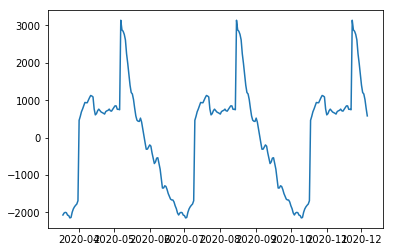

In [202]:
decomp = seasonal_decompose(df_covid_temp_france['Nombre de personnes hospitalisées'], freq = 100)
plt.plot(decomp.seasonal)

In [205]:
train = df_covid_temp_france['Nombre de personnes hospitalisées'][:198]
test = df_covid_temp_france['Nombre de personnes hospitalisées'][198:]

### Hyperparamètres

In [60]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [210]:
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = []
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal):
    models = []
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

if __name__ == '__main__':
	# data split
	n_test = 4
	# model configs
	cfg_list = sarima_configs([0, 4, 12])
	# grid search
	scores = grid_search(df_covid_temp_france['Nombre de personnes hospitalisées'], cfg_list, n_test)
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

 > Model[[(0, 0, 0), (0, 0, 0, 4), 'n']] 26315.993
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 26315.993
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 26315.993
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'n']] 13213.320
 > Model[[(0, 0, 0), (0, 0, 1, 4), 'n']] 12099.585
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 11431.669
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'n']] 7053.932
 > Model[[(0, 0, 0), (0, 1, 0, 4), 'n']] 1530.361
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 4936.262
 > Model[[(0, 0, 0), (0, 0, 2, 4), 'n']] 5823.647
 > Model[[(0, 0, 0), (0, 1, 1, 4), 'n']] 1697.415
 > Model[[(0, 0, 0), (0, 1, 2, 4), 'n']] 1014.179
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 2675.009
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'n']] 370.353
 > Model[[(0, 0, 0), (1, 0, 0, 4), 'n']] 1822.360
 > Model[[(0, 0, 0), (1, 0, 0, 12), 'n']] 4980.353
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 222.374
 > Model[[(0, 0, 0), (1, 0, 1, 4), 'n']] 1810.745
 > Model[[(0, 0, 0), (1, 0, 1, 12), 'n']] 1861.650
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'n']]

 > Model[[(0, 0, 0), (2, 0, 0, 4), 'ct']] 8414.526
 > Model[[(0, 0, 0), (2, 0, 0, 12), 'ct']] 11307.761
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'ct']] 4702.865
 > Model[[(0, 0, 0), (2, 0, 1, 4), 'ct']] 4547.522
 > Model[[(0, 0, 0), (2, 1, 2, 12), 't']] 1717.545
 > Model[[(0, 0, 0), (2, 0, 1, 12), 'ct']] 7820.105
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'ct']] 2893.610
 > Model[[(0, 0, 0), (2, 0, 2, 4), 'ct']] 3022.447
 > Model[[(0, 0, 0), (2, 1, 0, 4), 'ct']] 1016.906
 > Model[[(0, 0, 0), (2, 0, 2, 12), 'ct']] 6301.057
 > Model[[(0, 0, 0), (2, 1, 0, 12), 'ct']] 1157.535
 > Model[[(0, 0, 0), (0, 1, 2, 12), 'ct']] 2785.383
 > Model[[(0, 0, 0), (2, 1, 1, 4), 'ct']] 788.620
 > Model[[(0, 0, 0), (2, 1, 2, 4), 'ct']] 286.128
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'n']] 13213.320
 > Model[[(0, 0, 1), (0, 0, 0, 4), 'n']] 13213.320
 > Model[[(0, 0, 1), (0, 0, 0, 12), 'n']] 13213.320
 > Model[[(0, 0, 1), (0, 0, 1, 0), 'n']] 7274.974
 > Model[[(0, 0, 1), (0, 0, 1, 4), 'n']] 14415.896
 > Model[[(0, 0, 1), (0, 0,

 > Model[[(0, 0, 1), (0, 1, 2, 4), 'ct']] 742.439
 > Model[[(0, 0, 1), (1, 0, 0, 0), 'ct']] 1129.963
 > Model[[(0, 0, 1), (1, 0, 0, 4), 'ct']] 5352.635
 > Model[[(0, 0, 1), (1, 0, 0, 12), 'ct']] 14078.473
 > Model[[(0, 0, 1), (1, 0, 1, 0), 'ct']] 15734.557
 > Model[[(0, 0, 1), (1, 0, 1, 4), 'ct']] 10274.524
 > Model[[(0, 0, 1), (1, 1, 2, 12), 't']] 1394.980
 > Model[[(0, 0, 1), (1, 0, 1, 12), 'ct']] 7381.916
 > Model[[(0, 0, 1), (1, 0, 2, 0), 'ct']] 11673.576
 > Model[[(0, 0, 1), (1, 0, 2, 4), 'ct']] 1529.937
 > Model[[(0, 0, 1), (1, 1, 0, 4), 'ct']] 436.839
 > Model[[(0, 0, 1), (1, 1, 0, 12), 'ct']] 3111.073
 > Model[[(0, 0, 1), (1, 1, 1, 4), 'ct']] 461.374
 > Model[[(0, 0, 1), (1, 0, 2, 12), 'ct']] 4779.053
 > Model[[(0, 0, 1), (1, 1, 2, 4), 'ct']] 1204.062
 > Model[[(0, 0, 1), (1, 1, 1, 12), 'ct']] 1396.408
 > Model[[(0, 0, 1), (2, 0, 0, 0), 'ct']] 11486.739
 > Model[[(0, 0, 1), (2, 0, 0, 4), 'ct']] 22754.535
 > Model[[(0, 0, 1), (2, 0, 0, 12), 'ct']] 25399.245
 > Model[[(0, 0, 1), 

 > Model[[(0, 0, 2), (2, 1, 1, 4), 't']] 1306.571
 > Model[[(0, 0, 2), (0, 1, 2, 12), 't']] 1222.103
 > Model[[(0, 0, 2), (2, 1, 2, 4), 't']] 526.167
 > Model[[(0, 0, 2), (0, 0, 0, 0), 'ct']] 4073.410
 > Model[[(0, 0, 2), (0, 0, 0, 4), 'ct']] 4073.410
 > Model[[(0, 0, 2), (0, 0, 0, 12), 'ct']] 4073.410
 > Model[[(0, 0, 2), (0, 0, 1, 0), 'ct']] 15798.358
 > Model[[(0, 0, 2), (2, 1, 1, 12), 't']] 1288.966
 > Model[[(0, 0, 2), (0, 0, 1, 4), 'ct']] 17765.427
 > Model[[(0, 0, 2), (0, 0, 1, 12), 'ct']] 8581.228
 > Model[[(0, 0, 2), (0, 0, 2, 0), 'ct']] 12912.302
 > Model[[(0, 0, 2), (0, 0, 2, 4), 'ct']] 5632.952
 > Model[[(0, 0, 2), (0, 1, 0, 4), 'ct']] 480.522
 > Model[[(0, 0, 2), (0, 1, 0, 12), 'ct']] 1625.195
 > Model[[(0, 0, 2), (0, 1, 1, 4), 'ct']] 729.797
 > Model[[(0, 0, 2), (0, 0, 2, 12), 'ct']] 1480.297
 > Model[[(0, 0, 2), (0, 1, 2, 4), 'ct']] 561.412
 > Model[[(0, 0, 2), (1, 1, 2, 12), 't']] 1136.968
 > Model[[(0, 0, 2), (1, 0, 0, 0), 'ct']] 14338.617
 > Model[[(0, 0, 2), (0, 1, 1

 > Model[[(0, 1, 0), (1, 1, 1, 4), 't']] 478.847
 > Model[[(0, 1, 0), (2, 1, 1, 12), 'c']] 554.531
 > Model[[(0, 1, 0), (1, 1, 1, 12), 't']] 801.490
 > Model[[(0, 1, 0), (1, 1, 2, 4), 't']] 429.102
 > Model[[(0, 1, 0), (2, 0, 0, 0), 't']] 266.047
 > Model[[(0, 1, 0), (2, 0, 0, 4), 't']] 407.817
 > Model[[(0, 1, 0), (0, 1, 2, 12), 't']] 550.176
 > Model[[(0, 1, 0), (2, 0, 0, 12), 't']] 515.502
 > Model[[(0, 1, 0), (2, 0, 1, 0), 't']] 263.977
 > Model[[(0, 1, 0), (2, 0, 1, 4), 't']] 433.683
 > Model[[(0, 1, 0), (2, 0, 1, 12), 't']] 554.981
 > Model[[(0, 1, 0), (2, 0, 2, 0), 't']] 282.875
 > Model[[(0, 1, 0), (2, 0, 2, 4), 't']] 416.681
 > Model[[(0, 1, 0), (2, 1, 0, 4), 't']] 475.865
 > Model[[(0, 1, 0), (2, 0, 2, 12), 't']] 604.243
 > Model[[(0, 1, 0), (2, 1, 1, 4), 't']] 476.328
 > Model[[(0, 1, 0), (2, 1, 2, 12), 'c']] 440.814
 > Model[[(0, 1, 0), (2, 1, 2, 4), 't']] 445.735
 > Model[[(0, 1, 0), (2, 1, 0, 12), 't']] 720.604
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'ct']] 363.225
 > Model[[(

 > Model[[(0, 1, 1), (0, 1, 1, 4), 't']] 355.818
 > Model[[(0, 1, 1), (0, 0, 2, 12), 't']] 359.776
 > Model[[(0, 1, 1), (0, 1, 2, 4), 't']] 364.154
 > Model[[(0, 1, 1), (0, 1, 1, 12), 't']] 567.185
 > Model[[(0, 1, 1), (1, 0, 0, 0), 't']] 267.966
 > Model[[(0, 1, 1), (1, 0, 0, 4), 't']] 283.964
 > Model[[(0, 1, 1), (1, 0, 0, 12), 't']] 318.626
 > Model[[(0, 1, 1), (2, 1, 1, 12), 'c']] 520.837
 > Model[[(0, 1, 1), (1, 0, 1, 4), 't']] 277.261
 > Model[[(0, 1, 1), (1, 0, 1, 0), 't']] 258.039
 > Model[[(0, 1, 1), (1, 0, 1, 12), 't']] 334.046
 > Model[[(0, 1, 1), (1, 0, 2, 0), 't']] 250.563
 > Model[[(0, 1, 1), (1, 0, 2, 4), 't']] 273.401
 > Model[[(0, 1, 1), (1, 1, 0, 4), 't']] 357.284
 > Model[[(0, 1, 1), (1, 1, 0, 12), 't']] 560.774
 > Model[[(0, 1, 1), (1, 1, 1, 4), 't']] 357.500
 > Model[[(0, 1, 1), (1, 0, 2, 12), 't']] 427.967
 > Model[[(0, 1, 1), (1, 1, 2, 4), 't']] 358.045
 > Model[[(0, 1, 1), (1, 1, 1, 12), 't']] 490.970
 > Model[[(0, 1, 1), (2, 0, 0, 0), 't']] 254.688
 > Model[[(0

 > Model[[(0, 1, 2), (2, 1, 1, 4), 'c']] 356.399
 > Model[[(0, 1, 2), (2, 0, 2, 12), 'c']] 317.714
 > Model[[(0, 1, 2), (2, 1, 2, 4), 'c']] 338.274
 > Model[[(0, 1, 2), (1, 1, 2, 12), 'c']] 261.474
 > Model[[(0, 1, 2), (0, 0, 0, 0), 't']] 223.355
 > Model[[(0, 1, 2), (0, 0, 0, 4), 't']] 223.355
 > Model[[(0, 1, 2), (2, 1, 0, 12), 'c']] 317.413
 > Model[[(0, 1, 2), (0, 0, 0, 12), 't']] 223.355
 > Model[[(0, 1, 2), (0, 0, 1, 4), 't']] 241.621
 > Model[[(0, 1, 2), (0, 0, 1, 0), 't']] 248.804
 > Model[[(0, 1, 2), (0, 0, 1, 12), 't']] 253.645
 > Model[[(0, 1, 2), (0, 0, 2, 0), 't']] 102.288
 > Model[[(0, 1, 2), (0, 0, 2, 4), 't']] 151.477
 > Model[[(0, 1, 2), (0, 1, 0, 4), 't']] 352.759
 > Model[[(0, 1, 2), (0, 1, 0, 12), 't']] 670.729
 > Model[[(0, 1, 2), (0, 1, 1, 4), 't']] 348.144
 > Model[[(0, 1, 2), (0, 0, 2, 12), 't']] 247.651
 > Model[[(0, 1, 2), (0, 1, 2, 4), 't']] 353.700
 > Model[[(0, 1, 2), (0, 1, 1, 12), 't']] 233.749
 > Model[[(0, 1, 2), (1, 0, 0, 0), 't']] 258.038
 > Model[[(0

 > Model[[(1, 0, 0), (1, 1, 0, 12), 'c']] 689.058
 > Model[[(1, 0, 0), (1, 1, 1, 4), 'c']] 453.798
 > Model[[(1, 0, 0), (1, 1, 2, 4), 'c']] 455.792
 > Model[[(1, 0, 0), (1, 1, 1, 12), 'c']] 753.296
 > Model[[(1, 0, 0), (2, 0, 0, 0), 'c']] 273.906
 > Model[[(1, 0, 0), (2, 0, 0, 4), 'c']] 410.645
 > Model[[(1, 0, 0), (2, 1, 2, 12), 'n']] 606.153
 > Model[[(1, 0, 0), (2, 0, 1, 0), 'c']] 265.545
 > Model[[(1, 0, 0), (2, 0, 0, 12), 'c']] 559.280
 > Model[[(1, 0, 0), (2, 0, 1, 4), 'c']] 415.875
 > Model[[(1, 0, 0), (2, 0, 2, 0), 'c']] 281.602
 > Model[[(1, 0, 0), (2, 0, 2, 4), 'c']] 468.298
 > Model[[(1, 0, 0), (2, 0, 1, 12), 'c']] 603.420
 > Model[[(1, 0, 0), (2, 1, 0, 4), 'c']] 440.452
 > Model[[(1, 0, 0), (0, 1, 2, 12), 'c']] 566.875
 > Model[[(1, 0, 0), (2, 1, 1, 4), 'c']] 442.592
 > Model[[(1, 0, 0), (2, 0, 2, 12), 'c']] 687.159
 > Model[[(1, 0, 0), (2, 1, 2, 4), 'c']] 467.553
 > Model[[(1, 0, 0), (2, 1, 0, 12), 'c']] 713.080
 > Model[[(1, 0, 0), (0, 0, 0, 0), 't']] 403.810
 > Model[[(1

 > Model[[(1, 0, 1), (0, 1, 0, 12), 'c']] 620.469
 > Model[[(1, 0, 1), (0, 1, 1, 4), 'c']] 330.729
 > Model[[(1, 0, 1), (0, 1, 2, 4), 'c']] 333.451
 > Model[[(1, 0, 1), (0, 1, 1, 12), 'c']] 506.526
 > Model[[(1, 0, 1), (1, 0, 0, 0), 'c']] 278.316
 > Model[[(1, 0, 1), (1, 0, 0, 4), 'c']] 287.308
 > Model[[(1, 0, 1), (1, 0, 0, 12), 'c']] 341.428
 > Model[[(1, 0, 1), (1, 0, 1, 0), 'c']] 248.656
 > Model[[(1, 0, 1), (1, 0, 1, 4), 'c']] 294.970
 > Model[[(1, 0, 1), (1, 0, 1, 12), 'c']] 329.163
 > Model[[(1, 0, 1), (1, 0, 2, 0), 'c']] 200.059
 > Model[[(1, 0, 1), (2, 1, 1, 12), 'n']] 534.662
 > Model[[(1, 0, 1), (1, 0, 2, 4), 'c']] 311.992
 > Model[[(1, 0, 1), (1, 1, 0, 4), 'c']] 291.459
 > Model[[(1, 0, 1), (1, 1, 0, 12), 'c']] 512.238
 > Model[[(1, 0, 1), (1, 0, 2, 12), 'c']] 328.957
 > Model[[(1, 0, 1), (1, 1, 1, 4), 'c']] 291.266
 > Model[[(1, 0, 1), (1, 1, 2, 4), 'c']] 350.407
 > Model[[(1, 0, 1), (1, 1, 1, 12), 'c']] 483.680
 > Model[[(1, 0, 1), (2, 0, 0, 0), 'c']] 302.747
 > Model[[(1

 > Model[[(1, 0, 2), (2, 1, 1, 4), 'n']] 343.853
 > Model[[(1, 0, 2), (2, 1, 0, 12), 'n']] 323.128
 > Model[[(1, 0, 2), (2, 1, 2, 4), 'n']] 355.230
 > Model[[(1, 0, 2), (0, 1, 2, 12), 'n']] 339.357
 > Model[[(1, 0, 2), (0, 0, 0, 0), 'c']] 219.428
 > Model[[(1, 0, 2), (0, 0, 0, 4), 'c']] 219.428
 > Model[[(1, 0, 2), (0, 0, 0, 12), 'c']] 219.428
 > Model[[(1, 0, 2), (0, 0, 1, 0), 'c']] 248.812
 > Model[[(1, 0, 2), (0, 0, 1, 4), 'c']] 244.887
 > Model[[(1, 0, 2), (0, 0, 1, 12), 'c']] 290.904
 > Model[[(1, 0, 2), (0, 0, 2, 0), 'c']] 191.652
 > Model[[(1, 0, 2), (0, 0, 2, 4), 'c']] 254.966
 > Model[[(1, 0, 2), (1, 1, 2, 12), 'n']] 253.749
 > Model[[(1, 0, 2), (0, 1, 0, 4), 'c']] 335.458
 > Model[[(1, 0, 2), (0, 1, 0, 12), 'c']] 639.023
 > Model[[(1, 0, 2), (0, 0, 2, 12), 'c']] 211.320
 > Model[[(1, 0, 2), (0, 1, 1, 4), 'c']] 355.800
 > Model[[(1, 0, 2), (0, 1, 2, 4), 'c']] 325.793
 > Model[[(1, 0, 2), (0, 1, 1, 12), 'c']] 705.564
 > Model[[(1, 0, 2), (1, 0, 0, 0), 'c']] 260.427
 > Model[[(1

 > Model[[(1, 1, 0), (1, 1, 1, 12), 'n']] 189.183
 > Model[[(1, 1, 0), (1, 1, 2, 4), 'n']] 261.257
 > Model[[(1, 1, 0), (0, 1, 2, 12), 'n']] 194.703
 > Model[[(1, 1, 0), (2, 0, 0, 0), 'n']] 271.997
 > Model[[(1, 1, 0), (2, 0, 0, 4), 'n']] 247.153
 > Model[[(1, 1, 0), (2, 0, 0, 12), 'n']] 197.697
 > Model[[(1, 1, 0), (2, 0, 1, 0), 'n']] 276.178
 > Model[[(1, 0, 2), (2, 1, 1, 12), 'ct']] 288.154
 > Model[[(1, 1, 0), (2, 0, 1, 4), 'n']] 241.006
 > Model[[(1, 1, 0), (2, 0, 2, 0), 'n']] 257.518
 > Model[[(1, 1, 0), (2, 0, 1, 12), 'n']] 220.240
 > Model[[(1, 1, 0), (2, 0, 2, 4), 'n']] 191.585
 > Model[[(1, 1, 0), (2, 1, 0, 4), 'n']] 352.181
 > Model[[(1, 1, 0), (2, 0, 2, 12), 'n']] 168.203
 > Model[[(1, 1, 0), (2, 1, 0, 12), 'n']] 241.093
 > Model[[(1, 1, 0), (2, 1, 1, 4), 'n']] 249.345
 > Model[[(1, 1, 0), (2, 1, 2, 4), 'n']] 248.277
 > Model[[(1, 1, 0), (1, 1, 2, 12), 'n']] 172.559
 > Model[[(1, 1, 0), (0, 0, 0, 0), 'c']] 268.125
 > Model[[(1, 1, 0), (0, 0, 0, 4), 'c']] 268.125
 > Model[[(

 > Model[[(1, 1, 1), (0, 0, 2, 12), 'n']] 176.267
 > Model[[(1, 1, 1), (0, 1, 2, 4), 'n']] 264.456
 > Model[[(1, 1, 1), (0, 1, 1, 12), 'n']] 274.478
 > Model[[(1, 1, 1), (1, 0, 0, 0), 'n']] 272.293
 > Model[[(1, 1, 1), (1, 0, 0, 4), 'n']] 269.498
 > Model[[(1, 1, 1), (1, 0, 0, 12), 'n']] 187.785
 > Model[[(1, 1, 1), (1, 0, 1, 0), 'n']] 271.835
 > Model[[(1, 1, 1), (1, 0, 1, 4), 'n']] 272.554
 > Model[[(1, 1, 1), (1, 0, 1, 12), 'n']] 176.718
 > Model[[(1, 1, 1), (1, 0, 2, 0), 'n']] 249.303
 > Model[[(1, 1, 1), (1, 0, 2, 4), 'n']] 209.360
 > Model[[(1, 1, 0), (2, 1, 1, 12), 'ct']] 152.784
 > Model[[(1, 1, 1), (1, 1, 0, 4), 'n']] 332.112
 > Model[[(1, 1, 1), (1, 1, 0, 12), 'n']] 312.051
 > Model[[(1, 1, 1), (1, 0, 2, 12), 'n']] 180.212
 > Model[[(1, 1, 1), (1, 1, 1, 4), 'n']] 258.797
 > Model[[(1, 1, 1), (1, 1, 2, 4), 'n']] 259.305
 > Model[[(1, 1, 1), (1, 1, 1, 12), 'n']] 197.054
 > Model[[(1, 1, 1), (2, 0, 0, 0), 'n']] 269.636
 > Model[[(1, 1, 1), (2, 0, 0, 4), 'n']] 248.750
 > Model[[(

 > Model[[(1, 1, 1), (2, 1, 1, 4), 'ct']] 211.155
 > Model[[(1, 1, 1), (2, 1, 2, 4), 'ct']] 201.484
 > Model[[(1, 1, 1), (1, 1, 2, 12), 'ct']] 115.077
 > Model[[(1, 1, 2), (0, 0, 0, 0), 'n']] 257.281
 > Model[[(1, 1, 2), (0, 0, 0, 4), 'n']] 257.281
 > Model[[(1, 1, 2), (0, 0, 0, 12), 'n']] 257.281
 > Model[[(1, 1, 2), (0, 0, 1, 0), 'n']] 257.216
 > Model[[(1, 1, 2), (0, 0, 1, 4), 'n']] 250.916
 > Model[[(1, 1, 2), (0, 0, 1, 12), 'n']] 196.780
 > Model[[(1, 1, 2), (0, 0, 2, 0), 'n']] 255.958
 > Model[[(1, 1, 2), (0, 0, 2, 4), 'n']] 217.930
 > Model[[(1, 1, 2), (0, 0, 2, 12), 'n']] 200.036
 > Model[[(1, 1, 2), (0, 1, 0, 4), 'n']] 363.700
 > Model[[(1, 1, 2), (0, 1, 0, 12), 'n']] 689.929
 > Model[[(1, 1, 1), (2, 1, 0, 12), 'ct']] 224.955
 > Model[[(1, 1, 2), (0, 1, 1, 4), 'n']] 257.297
 > Model[[(1, 1, 2), (0, 1, 2, 4), 'n']] 327.195
 > Model[[(1, 1, 2), (0, 1, 1, 12), 'n']] 259.880
 > Model[[(1, 1, 2), (1, 0, 0, 0), 'n']] 257.496
 > Model[[(1, 1, 2), (1, 0, 0, 4), 'n']] 257.192
 > Model[

 > Model[[(1, 1, 2), (2, 1, 2, 12), 't']] 165.981
 > Model[[(1, 1, 2), (1, 1, 2, 4), 'ct']] 299.806
 > Model[[(1, 1, 2), (2, 0, 0, 0), 'ct']] 247.494
 > Model[[(1, 1, 2), (1, 1, 1, 12), 'ct']] 283.511
 > Model[[(1, 1, 2), (2, 0, 0, 4), 'ct']] 222.833
 > Model[[(1, 1, 2), (2, 0, 1, 0), 'ct']] 221.532
 > Model[[(1, 1, 2), (2, 0, 0, 12), 'ct']] 196.990
 > Model[[(1, 1, 2), (2, 0, 1, 4), 'ct']] 221.119
 > Model[[(1, 1, 2), (2, 0, 2, 0), 'ct']] 229.213
 > Model[[(1, 1, 2), (2, 0, 1, 12), 'ct']] 176.581
 > Model[[(1, 1, 2), (2, 0, 2, 4), 'ct']] 189.240
 > Model[[(1, 1, 2), (2, 1, 0, 4), 'ct']] 340.988
 > Model[[(1, 1, 2), (2, 0, 2, 12), 'ct']] 163.398
 > Model[[(1, 1, 2), (2, 1, 1, 4), 'ct']] 280.886
 > Model[[(1, 1, 2), (0, 1, 2, 12), 'ct']] 216.382
 > Model[[(1, 1, 2), (2, 1, 2, 4), 'ct']] 262.562
 > Model[[(1, 1, 2), (1, 1, 2, 12), 'ct']] 181.999
 > Model[[(2, 0, 0), (0, 0, 0, 0), 'n']] 284.309
 > Model[[(2, 0, 0), (0, 0, 0, 4), 'n']] 284.309
 > Model[[(2, 0, 0), (0, 0, 0, 12), 'n']] 284.

 > Model[[(2, 0, 0), (0, 1, 1, 12), 'ct']] 729.065
 > Model[[(2, 0, 0), (1, 0, 0, 0), 'ct']] 290.890
 > Model[[(2, 0, 0), (1, 0, 0, 4), 'ct']] 285.589
 > Model[[(2, 0, 0), (1, 0, 0, 12), 'ct']] 209.874
 > Model[[(2, 0, 0), (1, 0, 1, 0), 'ct']] 352.714
 > Model[[(2, 0, 0), (1, 0, 1, 4), 'ct']] 284.907
 > Model[[(2, 0, 0), (1, 0, 1, 12), 'ct']] 219.660
 > Model[[(2, 0, 0), (1, 0, 2, 0), 'ct']] 327.244
 > Model[[(2, 0, 0), (2, 1, 1, 12), 't']] 162.073
 > Model[[(2, 0, 0), (1, 0, 2, 4), 'ct']] 200.645
 > Model[[(2, 0, 0), (1, 1, 0, 4), 'ct']] 308.391
 > Model[[(2, 0, 0), (2, 1, 2, 12), 't']] 167.304
 > Model[[(2, 0, 0), (1, 1, 0, 12), 'ct']] 254.031
 > Model[[(2, 0, 0), (1, 0, 2, 12), 'ct']] 220.166
 > Model[[(2, 0, 0), (1, 1, 1, 4), 'ct']] 189.061
 > Model[[(2, 0, 0), (1, 1, 2, 4), 'ct']] 345.367
 > Model[[(2, 0, 0), (2, 0, 0, 0), 'ct']] 284.289
 > Model[[(2, 0, 0), (1, 1, 1, 12), 'ct']] 375.749
 > Model[[(2, 0, 0), (2, 0, 0, 4), 'ct']] 262.730
 > Model[[(2, 0, 0), (2, 0, 1, 0), 'ct']] 28

 > Model[[(2, 0, 1), (0, 0, 0, 0), 'ct']] 290.251
 > Model[[(2, 0, 1), (0, 0, 0, 4), 'ct']] 290.251
 > Model[[(2, 0, 1), (0, 0, 0, 12), 'ct']] 290.251
 > Model[[(2, 0, 1), (0, 0, 1, 0), 'ct']] 314.643
 > Model[[(2, 0, 1), (0, 0, 1, 4), 'ct']] 316.930
 > Model[[(2, 0, 1), (2, 1, 0, 12), 't']] 203.014
 > Model[[(2, 0, 1), (0, 0, 2, 0), 'ct']] 326.993
 > Model[[(2, 0, 1), (0, 0, 1, 12), 'ct']] 322.671
 > Model[[(2, 0, 1), (0, 0, 2, 4), 'ct']] 176.928
 > Model[[(2, 0, 1), (0, 1, 0, 4), 'ct']] 387.586
 > Model[[(2, 0, 1), (0, 1, 0, 12), 'ct']] 679.734
 > Model[[(2, 0, 1), (0, 1, 1, 4), 'ct']] 379.513
 > Model[[(2, 0, 1), (0, 0, 2, 12), 'ct']] 200.565
 > Model[[(2, 0, 1), (0, 1, 2, 4), 'ct']] 358.148
 > Model[[(2, 0, 1), (0, 1, 1, 12), 'ct']] 682.155
 > Model[[(2, 0, 1), (1, 0, 0, 0), 'ct']] 350.432
 > Model[[(2, 0, 1), (1, 0, 0, 4), 'ct']] 321.228
 > Model[[(2, 0, 1), (1, 0, 0, 12), 'ct']] 216.859
 > Model[[(2, 0, 1), (1, 0, 1, 0), 'ct']] 294.297
 > Model[[(2, 0, 1), (1, 0, 1, 4), 'ct']] 30

 > Model[[(2, 0, 2), (2, 1, 2, 12), 'c']] 247.230
 > Model[[(2, 0, 2), (2, 0, 0, 0), 't']] 275.601
 > Model[[(2, 0, 2), (2, 0, 0, 4), 't']] 256.321
 > Model[[(2, 0, 2), (2, 0, 1, 0), 't']] 251.918
 > Model[[(2, 0, 2), (2, 0, 1, 4), 't']] 249.904
 > Model[[(2, 0, 2), (2, 0, 0, 12), 't']] 227.529
 > Model[[(2, 0, 2), (2, 0, 2, 0), 't']] 250.095
 > Model[[(2, 0, 2), (2, 0, 2, 4), 't']] 233.094
 > Model[[(2, 0, 2), (2, 0, 1, 12), 't']] 221.638
 > Model[[(2, 0, 2), (2, 1, 0, 4), 't']] 313.787
 > Model[[(2, 0, 2), (2, 0, 2, 12), 't']] 224.108
 > Model[[(2, 0, 2), (2, 1, 1, 4), 't']] 243.289
 > Model[[(2, 0, 2), (0, 1, 2, 12), 't']] 644.867
 > Model[[(2, 0, 2), (2, 1, 2, 4), 't']] 296.669
 > Model[[(2, 0, 2), (2, 1, 0, 12), 't']] 305.323
 > Model[[(2, 0, 2), (0, 0, 0, 0), 'ct']] 320.438
 > Model[[(2, 0, 2), (1, 1, 2, 12), 't']] 725.010
 > Model[[(2, 0, 2), (0, 0, 0, 4), 'ct']] 320.438
 > Model[[(2, 0, 2), (0, 0, 0, 12), 'ct']] 320.438
 > Model[[(2, 0, 2), (0, 0, 1, 0), 'ct']] 312.073
 > Model

 > Model[[(2, 1, 0), (1, 0, 0, 0), 't']] 268.333
 > Model[[(2, 1, 0), (1, 0, 0, 4), 't']] 261.575
 > Model[[(2, 1, 0), (1, 0, 0, 12), 't']] 174.614
 > Model[[(2, 1, 0), (1, 0, 1, 0), 't']] 270.516
 > Model[[(2, 1, 0), (1, 0, 1, 4), 't']] 264.628
 > Model[[(2, 1, 0), (1, 0, 1, 12), 't']] 165.336
 > Model[[(2, 1, 0), (1, 0, 2, 0), 't']] 258.583
 > Model[[(2, 1, 0), (1, 0, 2, 4), 't']] 187.024
 > Model[[(2, 1, 0), (1, 0, 2, 12), 't']] 179.281
 > Model[[(2, 1, 0), (1, 1, 0, 4), 't']] 343.607
 > Model[[(2, 1, 0), (2, 1, 1, 12), 'c']] 136.298
 > Model[[(2, 1, 0), (1, 1, 0, 12), 't']] 326.932
 > Model[[(2, 1, 0), (1, 1, 1, 4), 't']] 251.599
 > Model[[(2, 1, 0), (1, 1, 2, 4), 't']] 257.558
 > Model[[(2, 1, 0), (1, 1, 1, 12), 't']] 182.740
 > Model[[(2, 1, 0), (2, 0, 0, 0), 't']] 257.684
 > Model[[(2, 1, 0), (2, 0, 0, 4), 't']] 235.080
 > Model[[(2, 1, 0), (0, 1, 2, 12), 't']] 143.374
 > Model[[(2, 1, 0), (2, 0, 1, 0), 't']] 255.823
 > Model[[(2, 1, 0), (2, 0, 0, 12), 't']] 178.790
 > Model[[(2

 > Model[[(2, 1, 1), (0, 0, 0, 0), 't']] 251.576
 > Model[[(2, 1, 1), (0, 0, 0, 4), 't']] 251.576
 > Model[[(2, 1, 1), (0, 0, 0, 12), 't']] 251.576
 > Model[[(2, 1, 1), (0, 0, 1, 0), 't']] 258.075
 > Model[[(2, 1, 1), (0, 0, 1, 4), 't']] 251.205
 > Model[[(2, 1, 1), (0, 0, 1, 12), 't']] 195.456
 > Model[[(2, 1, 1), (2, 1, 0, 12), 'c']] 205.868
 > Model[[(2, 1, 1), (0, 0, 2, 0), 't']] 255.731
 > Model[[(2, 1, 1), (0, 0, 2, 4), 't']] 205.500
 > Model[[(2, 1, 1), (0, 1, 0, 4), 't']] 370.204
 > Model[[(2, 1, 1), (0, 1, 0, 12), 't']] 637.992
 > Model[[(2, 1, 1), (0, 1, 1, 4), 't']] 258.160
 > Model[[(2, 1, 1), (0, 0, 2, 12), 't']] 213.991
 > Model[[(2, 1, 1), (0, 1, 2, 4), 't']] 245.776
 > Model[[(2, 1, 1), (0, 1, 1, 12), 't']] 282.054
 > Model[[(2, 1, 1), (2, 1, 1, 12), 'c']] 157.987
 > Model[[(2, 1, 1), (1, 0, 0, 0), 't']] 264.885
 > Model[[(2, 1, 1), (1, 0, 0, 4), 't']] 261.557
 > Model[[(2, 1, 1), (1, 0, 0, 12), 't']] 172.811
 > Model[[(2, 1, 1), (1, 0, 1, 0), 't']] 272.705
 > Model[[(2

 > Model[[(2, 1, 2), (1, 1, 1, 12), 'c']] 245.627
 > Model[[(2, 1, 2), (2, 0, 0, 4), 'c']] 250.535
 > Model[[(2, 1, 2), (2, 0, 0, 0), 'c']] 226.754
 > Model[[(2, 1, 2), (2, 0, 1, 0), 'c']] 229.494
 > Model[[(2, 1, 2), (2, 0, 1, 4), 'c']] 246.900
 > Model[[(2, 1, 2), (2, 0, 0, 12), 'c']] 237.485
 > Model[[(2, 1, 2), (2, 0, 2, 0), 'c']] 259.327
 > Model[[(2, 1, 2), (2, 0, 2, 4), 'c']] 207.884
 > Model[[(2, 1, 2), (2, 0, 1, 12), 'c']] 207.565
 > Model[[(2, 1, 2), (2, 1, 0, 4), 'c']] 335.319
 > Model[[(2, 1, 2), (2, 0, 2, 12), 'c']] 192.746
 > Model[[(2, 1, 2), (2, 1, 1, 4), 'c']] 232.498
 > Model[[(2, 1, 2), (0, 1, 2, 12), 'c']] 172.643
 > Model[[(2, 1, 2), (2, 1, 2, 4), 'c']] 299.562
 > Model[[(2, 1, 2), (1, 1, 2, 12), 'c']] 155.300
 > Model[[(2, 1, 2), (0, 0, 0, 0), 't']] 258.254
 > Model[[(2, 1, 2), (0, 0, 0, 4), 't']] 258.254
 > Model[[(2, 1, 2), (0, 0, 0, 12), 't']] 258.254
 > Model[[(2, 1, 2), (0, 0, 1, 0), 't']] 240.218
 > Model[[(2, 1, 2), (0, 0, 1, 4), 't']] 249.223
 > Model[[(2,

In [191]:
date[260]

'2020-12-03'

In [192]:
model = SARIMAX(df_covid_temp_france['Nombre de personnes hospitalisées'][:260], order=[1, 0, 2], seasonal_order=[0, 0, 2, 0], trend='ct', enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
pred = model_fit.predict(start='2020-12-03', end='2021-01-20')

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


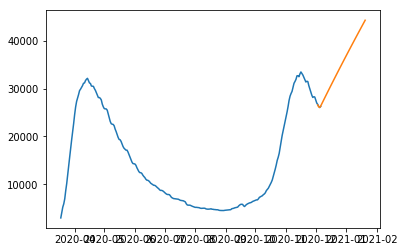

In [193]:
plt.plot(df_covid_temp_france['Nombre de personnes hospitalisées'])
plt.plot(pred)
plt.show()

In [489]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [492]:
model = ExponentialSmoothing(df_covid_temp_france['Nombre de personnes hospitalisées'][:254], trend = 'add', damped = True, seasonal = 'add', seasonal_periods = 4, freq = 'D')
model_fit = model.fit(damping_slope = 0.98)
pred = model_fit.predict(start='2020-11-28', end='2021-06-20')

In [305]:
def tracer(A_tracer, pred):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_covid_temp_france.index, y=df_covid_temp_france[A_tracer],
                        mode='lines',
                        name=A_tracer))

    fig.add_trace(go.Scatter(x=pred.index, y=pred,
                        mode='lines',
                        name='Prédiction'))

    fig.update_layout(title = 'Prédiction: ' + A_tracer,
                       xaxis_title = 'Jour',
                       yaxis_title = A_tracer)
    fig.show()

In [306]:
tracer('Nombre de personnes hospitalisées', pred)

In [510]:
model = ExponentialSmoothing(df_covid_temp_france['Nombre de personnes en réanimation'][:254], trend = 'add', damped = True, seasonal = 'add', seasonal_periods = 4, freq = 'D')
model_fit = model.fit(damping_slope = 0.968)
pred = model_fit.predict(start='2020-11-28', end='2021-06-20')

In [511]:
tracer('Nombre de personnes en réanimation', pred)

In [512]:
model = ExponentialSmoothing(df_covid_temp_france['Nombre cumulé de décès'][:254], trend = 'add', damped = True, seasonal = 'add', seasonal_periods = 4, freq = 'D')
model_fit = model.fit(damping_slope = 0.968)
pred = model_fit.predict(start='2020-11-28', end='2021-06-20')

In [513]:
tracer('Nombre cumulé de décès', pred)

In [441]:
from statsmodels.regression.linear_model import OLS, add_constant

In [541]:
df1 = pd.DataFrame(df_covid_temp.iloc[df_covid_temp.shape[0]-14, 0])
df2 = pd.DataFrame(df_maladies_temp.iloc[df_maladies_temp.shape[0]-14, 0])

X = np.array([df2['Taux hospitalisation asthme'].iloc[i] for i in range(len(df2.index))])
X_ = add_constant(X)
Y = np.array([df1['Nombre cumulé de décès'].iloc[i] for i in range(len(df1.index))])

df = pd.DataFrame(X_, columns = ['Taux hospitalisation asthme', 'cst'])
df['Nombre cumulé de décès'] = Y

model = OLS(Y, X_)
model_fit = model.fit()

#x_range = np.linspace(np.min(X), np.max(X), 96)

y_range = model_fit.predict(X_)

fig = px.scatter(df, x='Taux hospitalisation asthme', y='Nombre cumulé de décès', opacity = 0.65)
fig.add_traces(go.Scatter(x=X_, y=y_range, name='Regression Fit'))
fig.show()

In [538]:
df1 = pd.DataFrame(df_covid_temp.iloc[df_covid_temp.shape[0]-14, 0])
df2 = pd.DataFrame(df_maladies_temp.iloc[df_maladies_temp.shape[0]-14, 0])

X = np.array([df2['Taux hospitalisation asthme'].iloc[i] for i in range(len(df2.index))])
X_ = add_constant(X)
Y = np.array([df1['Nombre cumulé de décès'].iloc[i] for i in range(len(df1.index))])

df = pd.DataFrame(X_, columns = ['Taux hospitalisation asthme', 'cst'])
df['Nombre cumulé de décès'] = Y

model = OLS(Y, X_)
model_fit = model.fit()

x_range = np.linspace(np.min(X), np.max(X), 96)
x_range_ = add_constant(x_range)
y_range = model_fit.predict(x_range_)

figure = go.Figure()
figure.add_traces(go.Scatter(x=X, y=Y, name="Cloud", mode = "markers"))
figure.add_traces(go.Scatter(x=x_range, y=y_range, name="Regression Fit", mode = "lines"))
figure.show()

In [423]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     30.79
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.59e-07
Time:                        19:29:01   Log-Likelihood:                -729.06
No. Observations:                  96   AIC:                             1460.
Df Residuals:                      95   BIC:                             1463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0834      0.015      5.549      0.000       0.054       0.113
==============================================================================
Omnibus:                       40.054   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.639
Skew:                           1.595   Prob(JB):                     5.65e-20
Kurtosis:                       6.462   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1-5)**2))
X = add_constant(X)
beta = [5., 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
X.shape

(50, 4)

In [464]:
olsmod = OLS(y, X)
olsres = olsmod.fit()
ypred = olsres.predict(X)
print(ypred)

[ 4.52634604  5.01686789  5.46567751  5.84312678  6.13026743  6.32196419
  6.4277385   6.47020416  6.48135194  6.49729361  6.55232885  6.67330994
  6.87522996  7.15875953  7.51013658  7.90342745  8.30478768  8.67802262
  8.99053403  9.21867596  9.35163965  9.39322939  9.36123753  9.28452119
  9.19826116  9.13818175  9.13468144  9.20783846  9.36411201  9.59528101
  9.87979484 10.18631399 10.47885911 10.72272228 10.89016944 10.964997
 10.94519405 10.84327277 10.68421268 10.5013566  10.3309325  10.20610136
 10.15150893 10.17923645 10.2868158  10.45763496 10.66366735 10.87007649
 11.04093954 11.14514935]
